## Final Project Submission

* Student name: Alice Wanjiru Wamuyu 
* Student pace: part time
* Scheduled project review date/time: 20/10/2022
* Instructor name: Rose Delilah
* Blog post URL: 


# Microsoft Movie Studio Analysis

## Overview
This project analyzes Microsoft needs of setting up a movie studio. Microsoft sells computing devices, cloud systems and services, software, and other products to consumers and businesses and would like to venture into movie production. Exploratory Data Analysis will generate insights for Microsoft on What movies to produce.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I will be exploring what types of films are currently doing the best at the box office and translating my findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding
For this project, I used the imdb.title.basics, imdb.title.ratings and bom.movie_gross datasets. This datasets contain information on movie genres, The ratings on each movie, The studios they were created, The number of Votes for each movie, domestic gross, foreign gross and the running minutes of the movies.
My target variables are genres, Number of votes, Domestic Gross and the running minutes.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation
### Importing and cleaning data

In [2]:
# importing bom.movie_gross csv
moviedf = pd.read_csv("C:/Users/This PC/Documents/bom.movie_gross.csv")
moviedf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


moviedf.info()

In [3]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#cleaning column names for changes to take effect

moviedf.columns = [col.strip() for col in moviedf.columns]
moviedf.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

#### Cleaning the moviedf


In [5]:
#The studio column on the moviedf is missing 5 values. I will not drop the rows because the dataset is small so I will replace the 
#missing values with 'unknown'
moviedf['studio'].fillna('Unknown', inplace = True)

In [6]:
# The domestic_gross column is missing 28 values. The minimum Value is 100 while the maximum is 936700000.
# We cannot replace the null values with the mean because the mean will be affected by the outliers hence I replaced the 
#null values with the Zero assuming that some movies did not have a domestic gross
moviedf['domestic_gross'].describe() 

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [7]:
moviedf['domestic_gross'].fillna(0, inplace = True )

In [8]:
#The foreign gross column has over 1000 missing values. I opted to drop the column 
moviedf.drop(['foreign_gross'], axis = 1,inplace = True )

In [9]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [10]:
#importing title basics csv
basicsdf = pd.read_csv("C:/Users/This PC/Documents/title.basics.csv")
basicsdf

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [11]:
#getting description of the columns and identify null values
basicsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### Cleaning the basicsdf


In [12]:
# From the basicsdf.info(), The original_title column is missing some values but since my analysis will not need this column I will drop it
basicsdf.drop(['original_title'], axis = 1,inplace = True )

In [13]:
# The running_minutes also has some missing values. I replaced them with the average running time of the films since running time cannot be Zero
basicsdf['runtime_minutes']==1

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Name: runtime_minutes, Length: 146144, dtype: bool

In [14]:
# From the basicsdf.info(), genre columns has missing data which I will replace with 'unknown' because figuring out the movie genre is tough
basicsdf['genres'].fillna('Unknown', inplace = True)

In [15]:
basicsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [16]:
# importing title ratings csv
ratingsdf = pd.read_csv("C:/Users/This PC/Documents/title.ratings.csv")
ratingsdf.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
#cleaning column names
ratingsdf.columns = [col.strip() for col in ratingsdf.columns]
ratingsdf.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [18]:
ratingsdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
basicsdf.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres'], dtype='object')

In [20]:
basicsdf.columns = [col.strip() for col in basicsdf.columns]
basicsdf.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres'], dtype='object')

In [21]:
#changing column names from primary title to title
#basicsdf.rename(columns={'primary_title' : 'title'}, inplace= True)
#basicsdf
basicsdf

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,Unknown


## Merging Datasets
I first merged the ratings dataframe and basics dataframe on the primary key - tconst. I used the Outer Join

In [27]:
#merging ratings df and basics df on title
title_df = pd.merge(basicsdf,ratingsdf, on = ['tconst'], how = 'outer')
title_df. head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [23]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           146144 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


I then merged the title dataframe created above with the movies dataframe using the title and primary title . I used an Inner join so that I can get entries that were similar in both tables

In [30]:
# merging the title_df(basicsdf,ratingsdf) with the movies_df
Data = pd.merge(moviedf,title_df, left_on='title',right_on='primary_title', how='inner')
Data

,title,studio,domestic_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
1,Inception,WB,292600000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
2,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733.0
4,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0
...,...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance",5.9,9.0
3362,Souvenir,Strand,11400.0,2018,tt3478898,Souvenir,2014,86.0,Documentary,NaN,NaN
3363,Beauty and the Dogs,Osci.,8900.0,2018,tt6776572,Beauty and the Dogs,2017,100.0,"Crime,Drama,Thriller",7.0,1016.0
3364,The Quake,Magn.,6200.0,2018,tt6523720,The Quake,2018,106.0,"Action,Drama,Thriller",6.2,5270.0


In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 0 to 3365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3366 non-null   object 
 1   studio           3366 non-null   object 
 2   domestic_gross   3366 non-null   float64
 3   year             3366 non-null   int64  
 4   tconst           3366 non-null   object 
 5   primary_title    3366 non-null   object 
 6   start_year       3366 non-null   int64  
 7   runtime_minutes  3198 non-null   float64
 8   genres           3366 non-null   object 
 9   averagerating    3027 non-null   float64
 10  numvotes         3027 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 315.6+ KB


# Data Cleaning
Converting the columns domestic_gross, running_minutes and numvotes from float64 to integers

Dealing with missing values


## Dealing with missing values
From Data.info() we see there are columns with missing values

In [32]:
# dealing with missing values on the runtime_minutes column. I chose to fill the missing values with the average runtime of a movie 
Data['runtime_minutes'].fillna(Data['runtime_minutes'].mean(), inplace = True)

In [33]:
# For averagerating and numvotes columns, I replaced the missing values with Zero assuming the the movies did not have any rating nor votes.
Data['averagerating'].fillna(0, inplace = True)
Data['numvotes'].fillna(0, inplace = True)

In [34]:
display(Data.dtypes)

title               object
studio              object
domestic_gross     float64
year                 int64
tconst              object
primary_title       object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes           float64
dtype: object

In [35]:
#Converting the columns domestic_gross, running_minutes and numvotes from float64 to integers
Data = Data.astype({"domestic_gross":'int',"runtime_minutes":'int',"numvotes":'int'})
display(Data.dtypes)

title               object
studio              object
domestic_gross       int32
year                 int64
tconst              object
primary_title       object
start_year           int64
runtime_minutes      int32
genres              object
averagerating      float64
numvotes             int32
dtype: object

In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 0 to 3365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3366 non-null   object 
 1   studio           3366 non-null   object 
 2   domestic_gross   3366 non-null   int32  
 3   year             3366 non-null   int64  
 4   tconst           3366 non-null   object 
 5   primary_title    3366 non-null   object 
 6   start_year       3366 non-null   int64  
 7   runtime_minutes  3366 non-null   int32  
 8   genres           3366 non-null   object 
 9   averagerating    3366 non-null   float64
 10  numvotes         3366 non-null   int32  
dtypes: float64(1), int32(3), int64(2), object(5)
memory usage: 276.1+ KB


## Removing unwanted columns.
The entries in the title column are similar to those on the primary_title column.
I shall not use tconst in this analysis


In [37]:
Data.drop(['primary_title','tconst' ], axis = 1,inplace = True )

## Checking for duplicates

In [38]:
Data.duplicated().value_counts()

False    3365
True        1
dtype: int64

In [39]:
fData = Data.drop_duplicates()
fData

,title,studio,domestic_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000,2010,2010,103,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000,2010,2010,148,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000,2010,2010,93,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000,2010,2010,124,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000,2010,2010,124,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400,2018,2014,86,"Comedy,Romance",5.9,9
3362,Souvenir,Strand,11400,2018,2014,86,Documentary,0.0,0
3363,Beauty and the Dogs,Osci.,8900,2018,2017,100,"Crime,Drama,Thriller",7.0,1016
3364,The Quake,Magn.,6200,2018,2018,106,"Action,Drama,Thriller",6.2,5270


In [121]:
fData['start_year'].describe()

count    3365.000000
mean     2013.956612
std         2.530531
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: start_year, dtype: float64

In [40]:
fData.duplicated().sum()

0

## Analysis

### Frequency distribution of genres

Text(0.5, 1.0, 'Frequency distribution of genres')

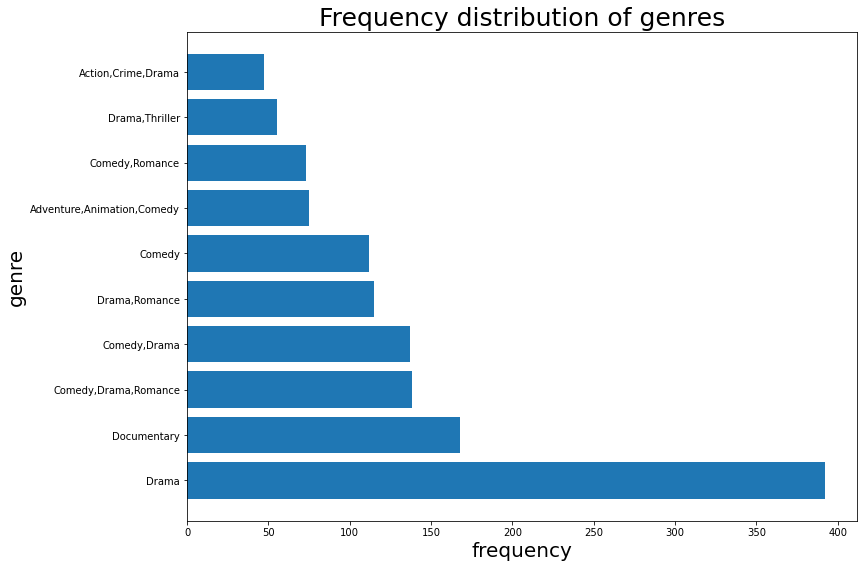

In [130]:
x = list(fData['genres'].value_counts()[:10].index)
y = list(fData['genres'].value_counts()[:10].values)
fig, ax = plt.subplots(figsize = (12, 9))
ax.barh(x, y)
ax.set_xlabel("frequency",size = 20)
ax.set_ylabel("genre", size = 20)
ax.set_title("Frequency distribution of genres",size = 25 )

## Correlation
I want to find out whether there are two variables that are correlated using a heat map


In [46]:
fData.corr()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
domestic_gross,1.000000,0.009848,0.021518,0.103791,0.082619,0.641548
year,0.009848,1.000000,0.695948,0.028845,0.037947,-0.110423
start_year,0.021518,0.695948,1.000000,0.017019,-0.185475,-0.102825
runtime_minutes,0.103791,0.028845,0.017019,1.000000,0.307462,0.245221
averagerating,0.082619,0.037947,-0.185475,0.307462,1.000000,0.259949
numvotes,0.641548,-0.110423,-0.102825,0.245221,0.259949,1.000000


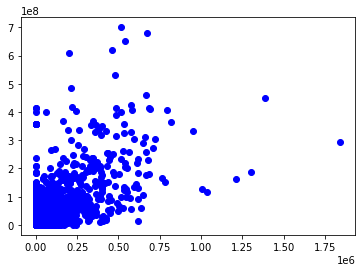

In [115]:
# correlation between numvotes and domestic_gross
x = fData['numvotes']
y = fData['domestic_gross']
plt.scatter(x, y, c ="blue")


### Genres vs number of votes

In [86]:
#what movies by genres had the most number of votes (numvotes)
data2 = fData.groupby(["genres"], sort = False).sum()


In [98]:
data3 = data2.reset_index()
data3

,genres,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
0,"Adventure,Animation,Comedy",9.645133e+09,151076,151065,7084,482.9,8037681
1,"Action,Adventure,Sci-Fi",1.102470e+10,94662,94658,6139,318.5,19721992
2,"Adventure,Drama,Fantasy",5.894000e+08,10067,10067,594,34.2,1273740
3,"Animation,Comedy,Family",8.753285e+08,14097,14096,651,45.0,972073
4,"Action,Adventure,Animation",2.184660e+09,44318,44311,2205,161.8,2749710
...,...,...,...,...,...,...,...
327,"Comedy,Crime,Horror",2.040000e+04,2017,2016,89,6.5,22367
328,"Adventure,Comedy,Horror",3.060000e+07,2018,2013,52,5.9,32
329,"Comedy,Sport",4.250000e+07,2018,2018,103,5.7,9739
330,"Documentary,History,War",1.811100e+07,4036,4036,188,16.0,15655


In [103]:
data4 = data3[["genres","numvotes"]]
data4

,genres,numvotes
0,"Adventure,Animation,Comedy",8037681
1,"Action,Adventure,Sci-Fi",19721992
2,"Adventure,Drama,Fantasy",1273740
3,"Animation,Comedy,Family",972073
4,"Action,Adventure,Animation",2749710
...,...,...
327,"Comedy,Crime,Horror",22367
328,"Adventure,Comedy,Horror",32
329,"Comedy,Sport",9739
330,"Documentary,History,War",15655


In [110]:
#sorting from largest to smallest
data5 = data4.sort_values("numvotes", ascending = False)[:10]
data5

,genres,numvotes
1,"Action,Adventure,Sci-Fi",19721992
0,"Adventure,Animation,Comedy",8037681
8,"Action,Adventure,Fantasy",7763568
21,"Comedy,Drama,Romance",5871460
117,"Action,Adventure,Comedy",5800318
31,Drama,4724607
48,"Action,Crime,Drama",3970171
22,Comedy,3881229
11,"Action,Adventure,Drama",3856948
58,"Action,Crime,Thriller",3806910


Text(0.5, 1.0, 'Total number of votes per genre')

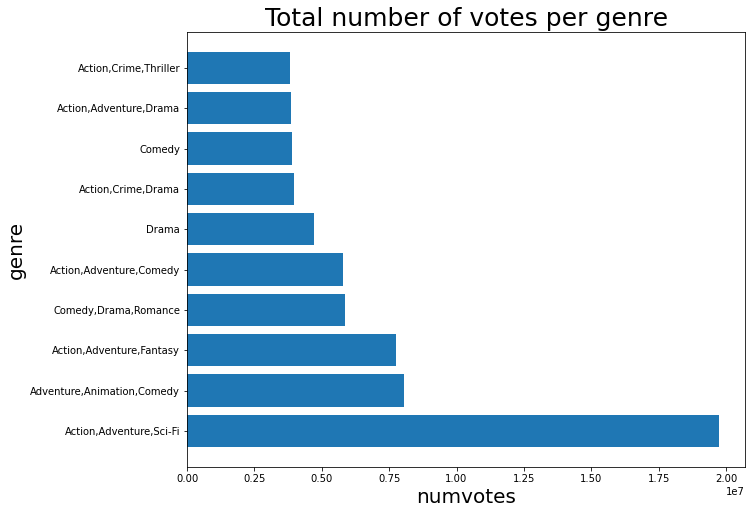

In [134]:
# Top 10 genres with the most numvotes
x = data5['genres']
y = data5["numvotes"]
fig, ax = plt.subplots(figsize = (10, 8))
ax.barh(x,y)
ax.set_xlabel("numvotes",size = 20)
ax.set_ylabel("genre", size = 20)
ax.set_title("Total number of votes per genre",size = 25 )

## Genres vs ratings


In [136]:
dataratings = data3[["genres","averagerating"]]
dataratings

,genres,averagerating
0,"Adventure,Animation,Comedy",482.9
1,"Action,Adventure,Sci-Fi",318.5
2,"Adventure,Drama,Fantasy",34.2
3,"Animation,Comedy,Family",45.0
4,"Action,Adventure,Animation",161.8
...,...,...
327,"Comedy,Crime,Horror",6.5
328,"Adventure,Comedy,Horror",5.9
329,"Comedy,Sport",5.7
330,"Documentary,History,War",16.0


In [137]:
#sorting from largest to smallest
datar = dataratings.sort_values("averagerating", ascending = False)[:10]
datar

,genres,averagerating
31,Drama,2115.3
73,"Comedy,Drama",876.3
21,"Comedy,Drama,Romance",838.2
36,Documentary,793.6
27,"Drama,Romance",743.8
22,Comedy,550.4
0,"Adventure,Animation,Comedy",482.9
17,"Comedy,Romance",437.8
9,"Drama,Thriller",348.0
1,"Action,Adventure,Sci-Fi",318.5


Text(0.5, 1.0, 'Total averagerating per genre')

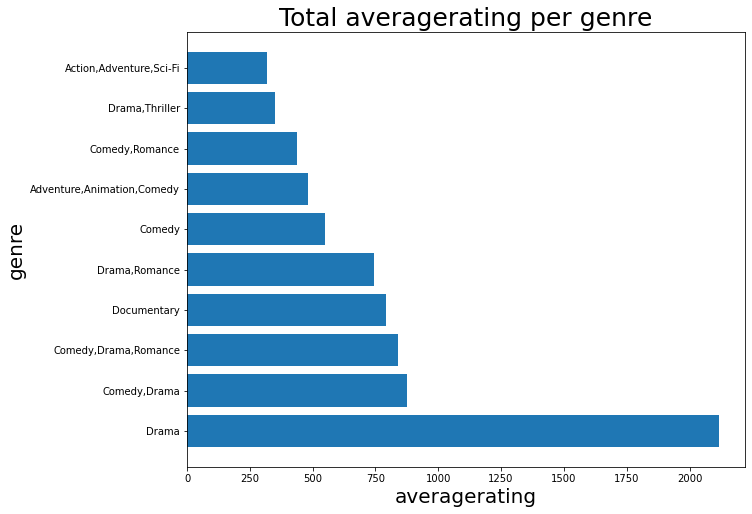

In [141]:
# Top 10 genres with the most ratings
x = datar["genres"]
y = datar['averagerating']
fig, ax = plt.subplots(figsize = (10, 8))
ax.barh(x,y)
ax.set_xlabel("averagerating",size = 20)
ax.set_ylabel("genre", size = 20)
ax.set_title("Total averagerating per genre",size = 25 )

# Conclusions
This analysis leads to three recommendations for the head of  Microsoft 
1) To produce Drama movies. 
Most movies from the data set are Drama. They are cheap to produce hence most studios prefer Drama to any other Genre. Genres such as Action and Thrillers may be expensive to produce because of their destructive nature.

2) You might consider producing Action, Adventure and Sci-Fi.
This genre has high number of votes which is positively correlated to the domestic gross income.

3) To produce Documentaries.
Documentaries are also many in the dataset, second from Drama.
Due to the nature of Documentaries, their production is relatively cheaper hence Microsoft will not have to spend a lumpsum of money at once on a studio. You can start off with documentaries then gradually grow the studio.  